Imports

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

Carregando o dataset

In [3]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


4431872/4422102 [==============================] - 1s 0us/step


Exploração dos dados

In [4]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

Exibição dos dados

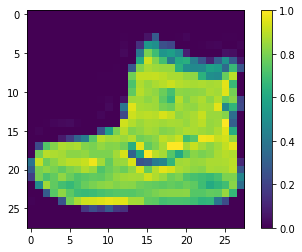

In [27]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

Normalizando as imagens

In [6]:
imagens_treino = imagens_treino/float(255)

Criando, compilando, treinando e normalizando o modelo

In [7]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

adam = keras.optimizers.Adam(lr=0.002)

'''lr
learning rate
taxa de aprendizado'''

parando_cedo = [keras.callbacks.EarlyStopping(monitor='val_loss'),
                keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',
                                               monitor='val_loss', save_best_only=True)]

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, 
                       batch_size = 480,
                       epochs=5, validation_split=0.2,
                       callbacks=parando_cedo)

C:\Users\PV\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
100/100 [==============================] - 1s 8ms/step - loss: 0.6436 - accuracy: 0.7747 - val_loss: 0.4579 - val_accuracy: 0.8340
Epoch 2/5
100/100 [==============================] - 1s 5ms/step - loss: 0.4380 - accuracy: 0.8454 - val_loss: 0.4012 - val_accuracy: 0.8577


Sumário do modelo

In [8]:
sumario_do_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Pesos da primeira camada Dense

In [9]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 0.00927886,  0.03064074, -0.06874281, ...,  0.04026292,
        -0.04643922,  0.02304983],
       [ 0.00177039,  0.01719159, -0.03199739, ..., -0.03019108,
         0.07265308, -0.00890136],
       [-0.00112666,  0.01481988, -0.00362731, ..., -0.00213963,
        -0.03386961,  0.03170851],
       ...,
       [ 0.06330126, -0.03768066,  0.06580237, ...,  0.07945216,
         0.01732094, -0.05304563],
       [ 0.07068977,  0.02515499,  0.03126472, ...,  0.01711445,
         0.00388414, -0.01375429],
       [ 0.07780433, -0.02836278,  0.02486101, ...,  0.01924247,
         0.03449529, -0.0162335 ]], dtype=float32)

In [11]:
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784, 256))

pesos_camada_dense_aleatorios = np.random.rand(784, 256)

'''
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense]
)
'''

'''modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense]
)'''

modelo.layers[1].get_weights()


[array([[ 0.00927886,  0.03064074, -0.06874281, ...,  0.04026292,
         -0.04643922,  0.02304983],
        [ 0.00177039,  0.01719159, -0.03199739, ..., -0.03019108,
          0.07265308, -0.00890136],
        [-0.00112666,  0.01481988, -0.00362731, ..., -0.00213963,
         -0.03386961,  0.03170851],
        ...,
        [ 0.06330126, -0.03768066,  0.06580237, ...,  0.07945216,
          0.01732094, -0.05304563],
        [ 0.07068977,  0.02515499,  0.03126472, ...,  0.01711445,
          0.00388414, -0.01375429],
        [ 0.07780433, -0.02836278,  0.02486101, ...,  0.01924247,
          0.03449529, -0.0162335 ]], dtype=float32),
 array([ 5.63206077e-02, -7.98093006e-02, -9.29110590e-03, -2.04596464e-02,
         6.21539578e-02, -2.20804643e-02, -2.19746642e-02,  1.10219773e-02,
         1.18531696e-01,  6.86242357e-02, -1.06217517e-02, -1.62468124e-02,
         6.20514043e-02, -1.84349658e-04,  7.18584135e-02,  1.07469693e-01,
         2.61477120e-02, -1.55616533e-02,  6.45552948e

In [12]:
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4223 - accuracy: 0.8473 - val_loss: 0.3939 - val_accuracy: 0.8570racy: 0.84
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3733 - accuracy: 0.8629 - val_loss: 0.3657 - val_accuracy: 0.8657
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3486 - accuracy: 0.8717 - val_loss: 0.3423 - val_accuracy: 0.8750
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3284 - accuracy: 0.8771 - val_loss: 0.3510 - val_accuracy: 0.8729 loss: 0.3248 - accura - ETA: 0s - loss: 0.3280 - accuracy:  - ETA: 0s - loss: 0.3280 - ac
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3146 - accuracy: 0.8828 - val_loss: 0.3308 - val_accuracy: 0.8786


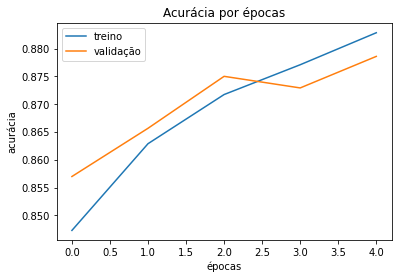

In [15]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


In [17]:
modelo.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 

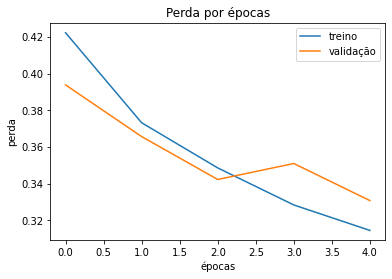

In [18]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [19]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

In [20]:
vieses_camada_dense_zerados = np.zeros((256,))
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zerados]
)

Salvando e carregando o modelo treinado

In [21]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Visualizando as acurácias de treino e validação por época

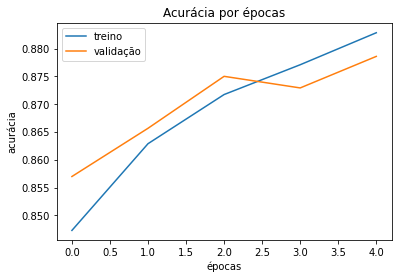

In [26]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


Visualizando as perdas de treino e validação por época

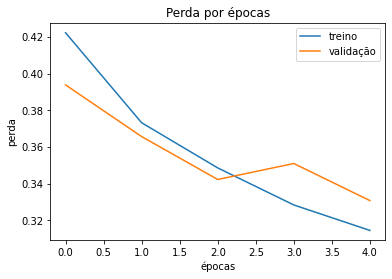

In [23]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo e o modelo salvo

In [24]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 5
número da imagem de teste: 2
resultado teste modelo salvo: 5
número da imagem de teste: 2


Avaliando o modelo

In [25]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 0s 1ms/step - loss: 249556.2031 - accuracy: 0.1000
Perda do teste: 249556.203125
Acurácia do teste: 0.10000000149011612
